In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("medical-charges.csv")

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
df.shape

(1338, 7)

In [10]:
X = df.drop(columns=["charges"])
y = df["charges"]

X.head(), y.head()

(   age     sex     bmi  children smoker     region
 0   19  female  27.900         0    yes  southwest
 1   18    male  33.770         1     no  southeast
 2   28    male  33.000         3     no  southeast
 3   33    male  22.705         0     no  northwest
 4   32    male  28.880         0     no  northwest,
 0    16884.92400
 1     1725.55230
 2     4449.46200
 3    21984.47061
 4     3866.85520
 Name: charges, dtype: float64)

In [11]:
categorical_cols = ["sex", "smoker", "region"]

In [13]:
X_encoded = pd.get_dummies(
    X,
    columns=categorical_cols,
    drop_first=True
)

In [16]:
X_encoded.head()
X_encoded.shape

(1338, 8)

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded,
    y,
    test_size=0.2,
    random_state=42
)

In [21]:
X_train.shape

(1070, 8)

In [22]:
X_test.shape

(268, 8)

In [23]:
y_train.shape

(1070,)

In [24]:
y_test.shape

(268,)

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
print(X_train_scaled.mean(axis=0))
print(X_train_scaled.std(axis=0))

[-1.99217589e-16 -4.64841042e-17 -2.32420521e-17 -6.30855700e-17
  2.98826384e-17 -4.64841042e-17 -3.32029316e-17  7.30464495e-17]
[1. 1. 1. 1. 1. 1. 1. 1.]


In [29]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train_scaled, y_train)

LinearRegression()

In [31]:
y_pred = lr.predict(X_test_scaled)
y_pred[:5]

array([ 8969.55027444,  7068.74744287, 36858.41091155,  9454.67850053,
       26973.17345656])

In [32]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)

mae

4181.194473753655

In [33]:
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

5796.284659276275

In [34]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
r2

0.7835929767120722

In [42]:
coefficients = pd.DataFrame({
    "feature": X_encoded.columns,
    "coefficient": lr.coef_
})

coefficients.sort_values(by="coefficient", ascending=False)


,feature,coefficient
4,smoker_yes,9558.481409
0,age,3614.975415
1,bmi,2036.228123
2,children,516.890247
3,sex_male,-9.293101
5,region_northwest,-158.140981
6,region_southeast,-290.157047
7,region_southwest,-349.110678


In [43]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators = 200,
    random_state=42
)

rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=42)

In [44]:
y_pred_rf = rf.predict(X_test)
y_pred_rf[:5]

array([10160.158731  ,  5389.90344375, 28231.1933775 , 12112.05296255,
       34677.37624355])

In [45]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

mae_rf, rmse_rf, r2_rf

(2560.035377120059, 4586.995325378359, 0.86447215437533)

In [46]:
def eval_regression(y_true, y_pred, name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return {"model": name, "MAE": mae, "RMSE": rmse, "R2": r2}

results = []
results.append(eval_regression(y_test, y_pred, "Linear Regression"))
results.append(eval_regression(y_test, y_pred_rf, "Random Forest"))

results_df = pd.DataFrame(results).sort_values("R2", ascending=False)
results_df

,model,MAE,RMSE,R2
1,Random Forest,2560.035377,4586.995325,0.864472
0,Linear Regression,4181.194474,5796.284659,0.783593


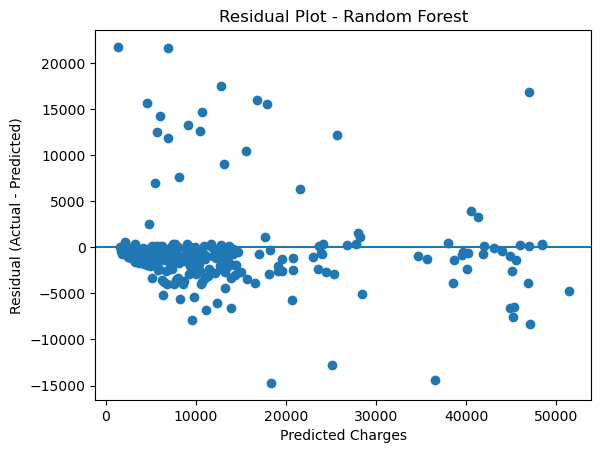

In [47]:
import matplotlib.pyplot as plt

residuals = y_test - y_pred_rf

plt.figure()
plt.scatter(y_pred_rf, residuals)
plt.axhline(0)
plt.xlabel("Predicted Charges")
plt.ylabel("Residual (Actual - Predicted)")
plt.title("Residual Plot - Random Forest")
plt.show()

In [48]:
importances = pd.DataFrame({
    "feature": X_encoded.columns,
    "importance": rf.feature_importances_
}).sort_values("importance", ascending=False)

importances


,feature,importance
4,smoker_yes,0.609377
1,bmi,0.214875
0,age,0.134682
2,children,0.019562
3,sex_male,0.006306
5,region_northwest,0.005726
6,region_southeast,0.005402
7,region_southwest,0.004070


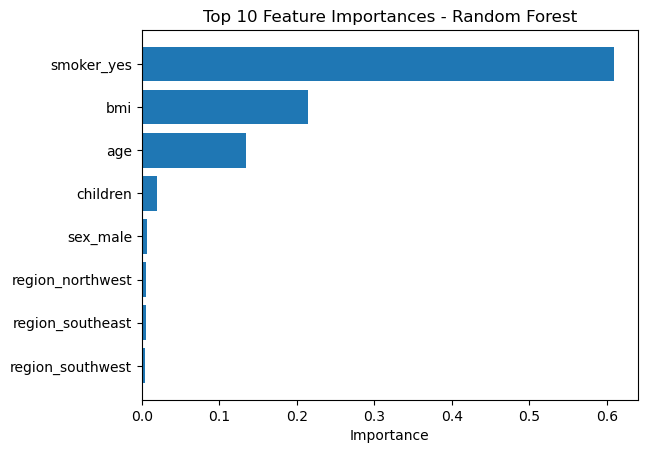

In [49]:
plt.figure()
plt.barh(importances["feature"][:10][::-1], importances["importance"][:10][::-1])
plt.xlabel("Importance")
plt.title("Top 10 Feature Importances - Random Forest")
plt.show()
